# Hierarchical Clustering 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customer_data = pd.read_csv('shop.csv')

In [3]:
customer_data.shape

(200, 5)

In [4]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
data=customer_data.iloc[:, 3:5].values

In [8]:
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

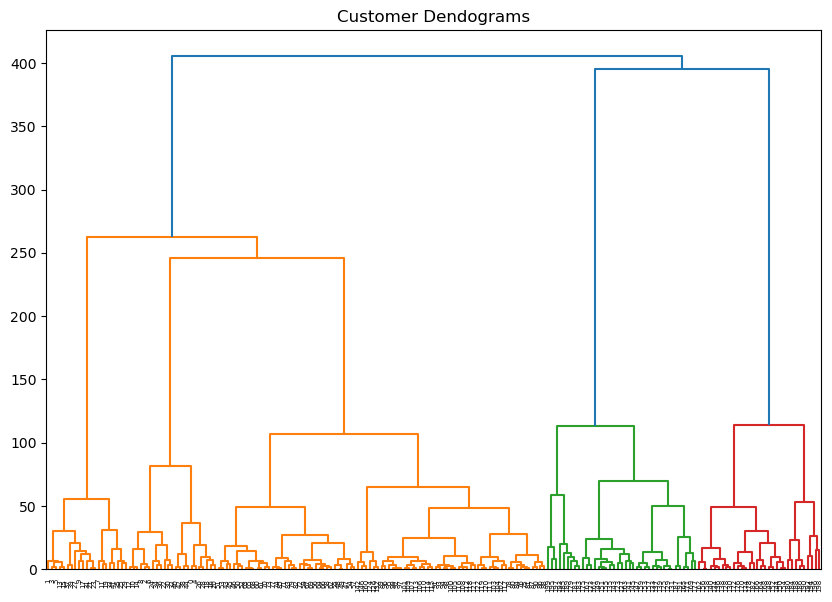

In [9]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data,method='ward')) #single,complete,average,ward

In [10]:
from sklearn.cluster import AgglomerativeClustering

cluster1 = AgglomerativeClustering(n_clusters=5)
labels_=cluster1.fit_predict(data)

In [11]:
labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [12]:
customer_data['cluster'] = cluster1.labels_

<Axes: ylabel='count'>

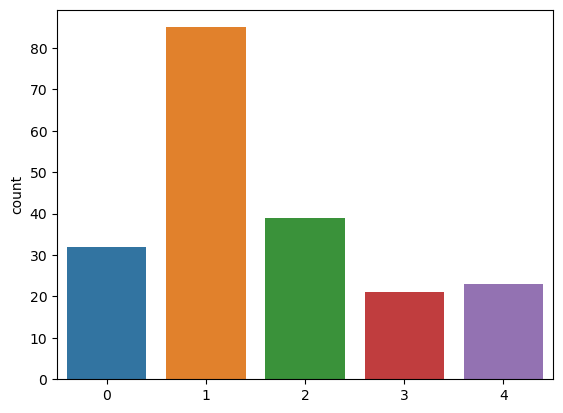

In [14]:
sns.countplot(x=labels_)

In [15]:
customer_data.groupby('cluster').count()['CustomerID']

cluster
0    32
1    85
2    39
3    21
4    23
Name: CustomerID, dtype: int64

Text(0, 0.5, 'Spending Score')

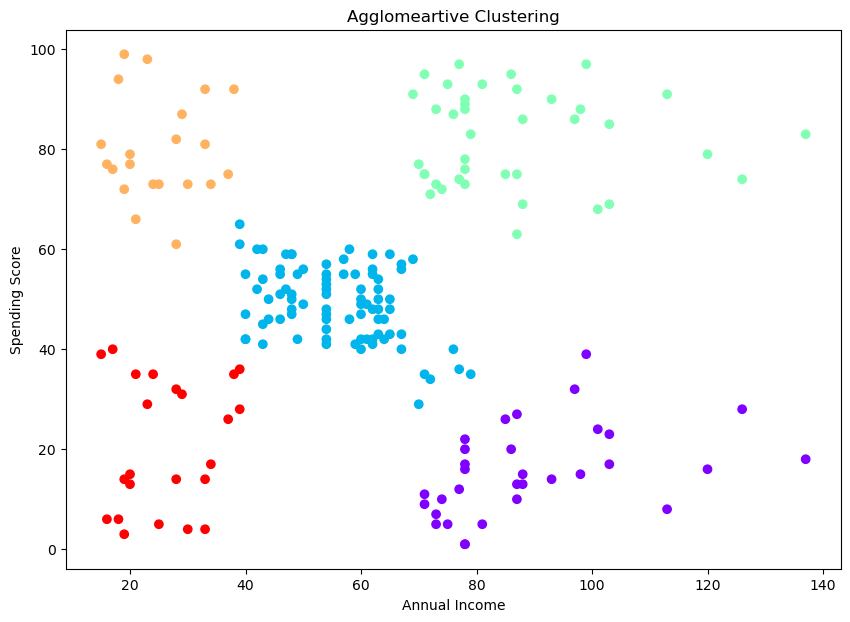

In [19]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0], data[:,1], c=cluster1.labels_, cmap='rainbow')
plt.title('Agglomeartive Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

In [20]:
from sklearn.metrics import silhouette_score

In [23]:
range_n_clusters=[2,3,4,5,6]
for n_clusters in range_n_clusters:
    my_cluster_model=AgglomerativeClustering(n_clusters=n_clusters)
    m=my_cluster_model.fit_predict(data)
    silhouette_avg=silhouette_score(data, m)
    print("For n_clusters =", n_clusters, 
          "The average silhouette_score is :",silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.36706444723912895
For n_clusters = 3 The average silhouette_score is : 0.4618340266628975
For n_clusters = 4 The average silhouette_score is : 0.4916598193892782
For n_clusters = 5 The average silhouette_score is : 0.5529945955148897
For n_clusters = 6 The average silhouette_score is : 0.5380208285578872
